<a href="https://colab.research.google.com/github/akashbilgi/DMT/blob/main/part3_DMT_SVM_correctness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/implementation_correctness_dataset.csv')
df



,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


In [ ]:
df.shape

(17, 3)

In [ ]:
df.iloc[:,-1]=df.iloc[:,-1].replace(2,0)

In [ ]:
df

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


from sklearn.svm import SVC

import os

In [ ]:
X = df.iloc[:,:-1]
X['Feature 3']=X.apply(lambda x: 2*x['Feature 1']*x["Feature 2"]/(x['Feature 1']+x["Feature 2"]),axis=1)#2*a*b/(a+b)
print(X.shape)
X

(17, 3)


,Feature 1,Feature 2,Feature 3
0,0.020,0.000000,0.000000
1,1.045,0.000000,0.000000
2,2.080,0.000000,0.000000
3,3.125,0.000000,0.000000
4,4.180,0.000000,0.000000
5,5.245,0.000000,0.000000
6,6.320,0.000000,0.000000
7,7.405,0.000000,0.000000
8,8.500,0.000000,0.000000
9,9.605,0.000000,0.000000


In [ ]:
y = df.iloc[:,-1]
print(y.shape)
y.head()

(17,)


0    1
1    1
2    1
3    1
4    1
Name: Class/Cluster, dtype: int64

In [ ]:
y_num = pd.get_dummies(y)
y_num.tail()

,0,1
12,0,1
13,0,1
14,1,0
15,1,0
16,1,0


In [ ]:
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

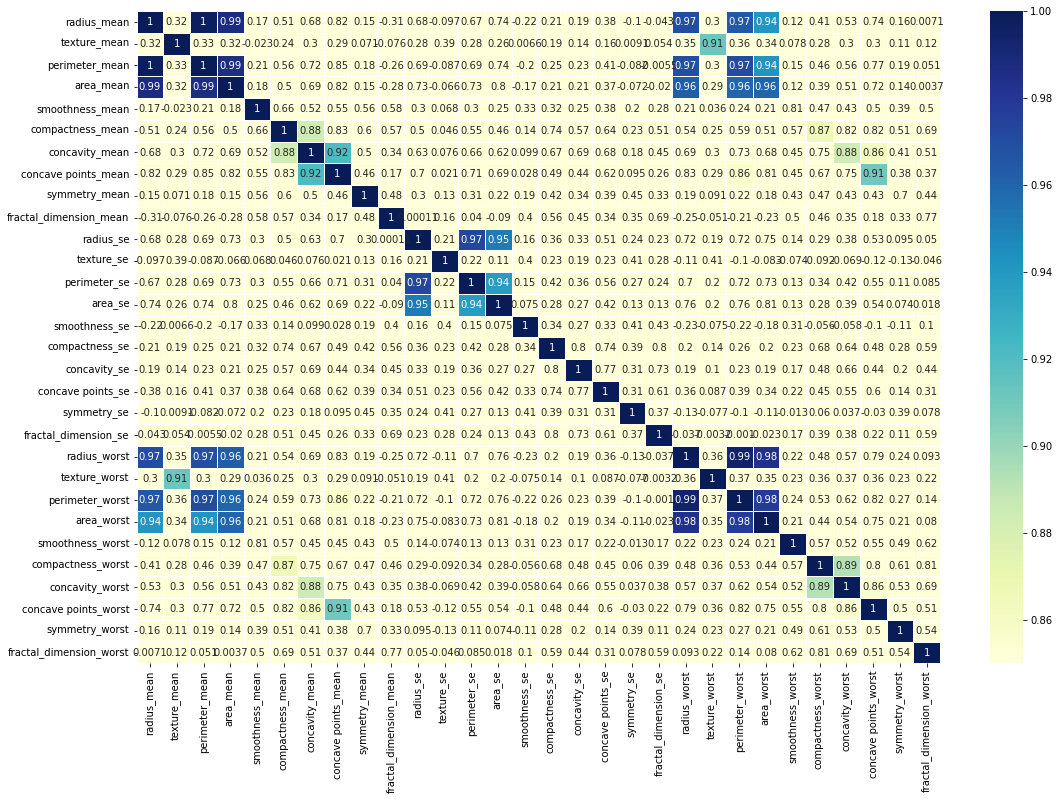

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(X.corr(), vmin=0.85, vmax=1, annot=True, cmap='YlGnBu', linewidths=.5)

In [ ]:
#reducing the attributes in X dataframe

#1 scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2 drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se 
X_scaled = pd.DataFrame(X_scaled)
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)

#3 apply PCA on scaled data
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled_drop)
x_pca = pd.DataFrame(x_pca)

print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (569, 30) 
After PCA, x_pca dataframe shape =  (569, 11)


In [ ]:
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.sum())

[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.9602558201892889


In [ ]:
import numpy as np
colnames = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']

#target data
diag = df.iloc[:,1:2]

#combine PCA and target data
Xy = pd.DataFrame(np.hstack([x_pca,diag.values]),columns=colnames)

Xy.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,diagnosis
0,8.066802,0.414765,-2.538073,-2.608014,-1.344494,1.435172,-1.713811,-0.491329,0.655096,0.544224,0.718321,M
1,0.106798,-2.761727,-0.141345,-1.395074,0.130814,0.017362,-0.333451,-0.389474,-0.706687,0.114084,0.405121,M
2,4.386099,-1.969883,-0.226679,-1.108399,-0.700594,0.477506,0.287285,-0.079434,-0.35264,-0.654396,-0.284427,M
3,10.670616,5.914865,-4.302831,1.998226,-1.846898,3.101734,-0.812473,-1.813327,1.334007,-0.454319,-1.428596,M
4,2.03748,-1.154659,0.905585,-3.346186,-0.640128,-1.333159,0.604286,-0.462435,-0.232974,0.37583,0.567374,M


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


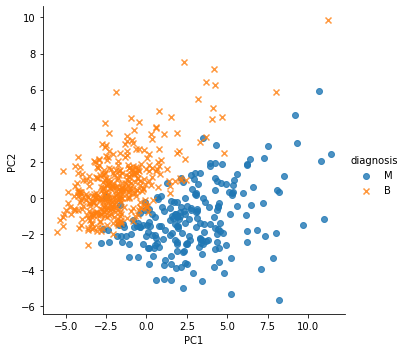

In [ ]:
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False, markers=["o", "x"])
plt.show()

In [ ]:
X=(Xy.iloc[:,0:11]).values
#75:25 train:test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape  (426, 11)
y_train shape  (426,)
X_test shape  (143, 11)
y_test shape  (143,)


In [ ]:
svc = SVC(kernel="linear")
svc.fit(X, y)

SVC(kernel='linear')

In [ ]:
y_pred_svc =svc.predict(X_test)
y_pred_svc.shape

NameError: ignored

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[89  1]
 [ 3 50]]


In [ ]:
creport = classification_report(y_test, y_pred_svc)
print("Classification report:\n",creport)

Classification report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        90
           M       0.98      0.94      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



[-1.05042327e-05 -1.73055240e-04 -9.46931920e-01]


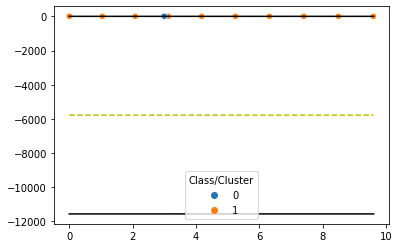

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
w=svc.coef_[0]
X_train=X.values
y_train=y
print(w)
def visualize():
        b =svc.intercept_
        sns.scatterplot(x=X_train[:,0], 
                y=X_train[:, 1], 
                hue=y_train);

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return -(w[0]*x-b+v) / w[1]

        datarange = (min(X_train[:,0])*0.999,max(X_train[:,0])*1.001)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, w, b, 1)
        psv2 = hyperplane(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, w, b, -1)
        nsv2 = hyperplane(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, w, b, 0)
        db2 = hyperplane(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        

        plt.show()
visualize()

# print(min(X[:,0]),max(X[:,0]))

In [ ]:
w[0]

3.241019008726198e-08

[-1.05042327e-05 -1.73055240e-04 -9.46931920e-01] [1.00016838]


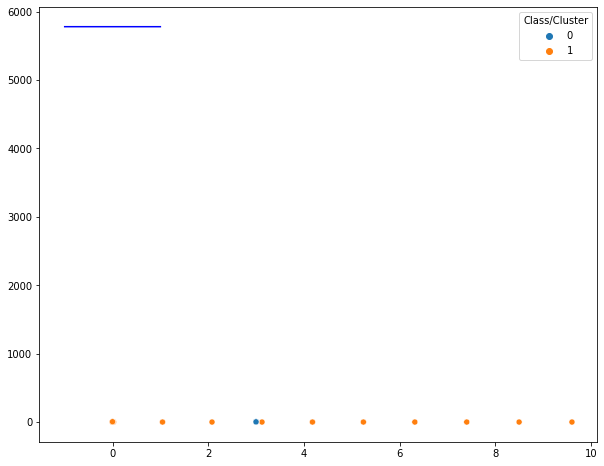

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
b =svc.intercept_
sns.scatterplot(x=X_train[:,0], 
                y=X_train[:,1], 
                hue=y_train)
# Constructing a hyperplane using a formula.
        # w consists of 2 elements
b = b      # b consists of 1 element
print(w,b)
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='b')

In [ ]:
y_pred_svc =svc.predict(X)
y_pred_svc.shape
creport = classification_report(y, y_pred_svc)
print("Classification report:\n",creport)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        14

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [ ]:
svc.predict(np.array([4,4,4]).reshape(1,3))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
svc.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
2*4*4/(8)

4.0

In [ ]:
SVC()

In [ ]:
svc=SVM()

In [ ]:
svc.fit(X.to_numpy(),y.to_numpy())

(array([[ 0.02159314,  0.00297683, -0.96020712]]),
 1.0070000000000254,
 [1.0,
  1.1155912011260418,
  1.2325597611546082,
  1.3509013403085386,
  1.4116747062662927,
  1.4484648348139484,
  1.4853917992237533,
  1.501413128062256,
  1.5174680580603666,
  1.5335564704145708,
  1.5319730166309171,
  1.53039875401804,
  1.5288336701709422,
  1.5272777527034564,
  1.525730989248213,
  1.5241933674566077,
  1.5226648749987717,
  1.5211454995635392,
  1.5196352288584152,
  1.5181340506095464,
  1.5166419525616872,
  1.51515892247817,
  1.5136849481408738,
  1.5122200173501932,
  1.5107641179250062,
  1.4949447845762436,
  1.4935150605472602,
  1.4777288836880145,
  1.4619720551726272,
  1.460585534592651,
  1.4448617222536073,
  1.4435012174296475,
  1.427810349723629,
  1.4121486984799911,
  1.410831132308469,
  1.3952022862491182,
  1.3939105773025044,
  1.3783144653887018,
  1.3627474388693488,
  1.3614984055663129,
  1.345963974602025,
  1.3304585408269503,
  1.329252013829053,
  1.3137

In [ ]:
svc.predict(X)

ValueError: ignored

In [ ]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
15    0
16    0
Name: Class/Cluster, dtype: int64

# Working Code

In [ ]:
import numpy as np


class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)
    

In [ ]:
#Convert class 0 to -1
Y=df.iloc[:,-1]=df.iloc[:,-1].replace(0,-1)

In [ ]:
X

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14   -1
15   -1
16   -1
Name: Class/Cluster, dtype: int64

In [ ]:
svc.predict(X.to_numpy())

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1.])

In [ ]:
svc.predict((4,4,4))

-1.0